# Income Classification using Logistic Regression

In this project, I will use a dataset containing census information from the 1994 Census to create a logistic regression model, that predicts whether or not a person makes more than $50,000 a year.


### Dataset

Data set is available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/20/census+income).

### Features

Input and Output `features`:
* age: continuous
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
* sex: Female, Male
* capital-gain: continuous
* capital-loss: continuous
* hours-per-week: continuous
* native country: discrete
* income: discrete, >50K, <=50K

------

### EDA and Logistic Regression Assumptions
1. The dataset has been saved as a dataframe named `df`. The outcome variable here is `income`. Check if the dataset is `imbalanced`.
2. Notice we have created a variable named `feature_cols`. This contains a list of the variables we will use as our predictor variables.
    `Transform` the dataset of predictor variables to dummy variables and save this in a new DataFrame called `X`.
3. Using `X`, create a `heatmap` of the correlation values.
4. Determine if `scaling` is needed for `X` prior to modeling. Then create the `y` output variable which is binary, `0` when income is less than $50K, `1` when greater than $50K.

### Logistic Regression Models and Evaluation
5. Split the data into a training and testing set. Set the `random_state` to 1 and `test_size` to `.2`.
6. Print the model parameters (`intercept` and `coefficients`).
7. Evaluate the predictions of the model on the `test set`. Print the `confusion matrix` and `accuracy score`.
8. Create a new DataFrame of the model coefficients and variable names. Sort values based on coefficient and exclude any that are equal to zero. Print the values of the DataFrame.
9. Create a `barplot` of the coefficients sorted in ascending order.
10. Plot the `ROC curve` and print the `AUC value`.

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data',header = None, names = col_names)

#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
print(df.head())
print(df.columns)

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [226]:
#1. Check Class Imbalance
print(df.income.value_counts(normalize=True))

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64


In [227]:
#2. Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education', 'relationship']
X = pd.get_dummies(df[feature_cols], drop_first=True)

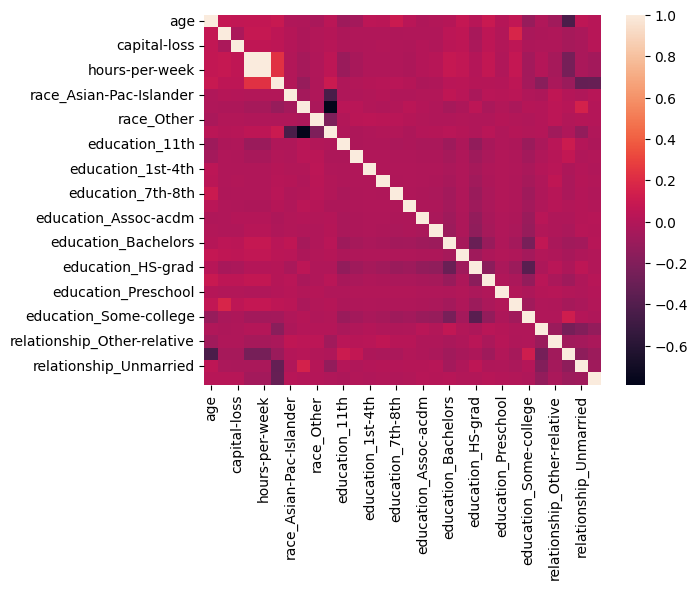

In [228]:
#3. Create a heatmap of X data to see feature correlation
plt.figure()
sns.heatmap(X.corr())#, annot=True)
plt.show()
plt.close()

In [229]:
#4. Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k
y = np.where(df.income=='<=50K', 0, 1)

In [230]:
#5a. Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)

#5b. Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [231]:
#6. Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:')
print(log_reg.intercept_[0])
print('Model Parameters, Coeff:')
print(log_reg.coef_)

Model Parameters, Intercept:
-3.7989632247843548
Model Parameters, Coeff:
[[ 2.02315849e-02  3.07066776e-04  6.38507344e-04  1.96433675e-03
   2.73563374e-02  5.21714172e-01  0.00000000e+00 -1.23946882e-01
   0.00000000e+00  6.90330893e-02 -4.46225120e-01  0.00000000e+00
   0.00000000e+00 -4.03360453e-01 -9.17118602e-01 -4.66231353e-01
   5.81619875e-01  4.97248647e-01  1.41326614e+00  1.93433816e+00
   0.00000000e+00  1.73680508e+00  0.00000000e+00  1.90215357e+00
   4.57045648e-01 -1.85104528e+00 -1.60641731e+00 -2.88798195e+00
  -1.83030390e+00  9.02955487e-01]]


In [232]:
#7. Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.
print('Confusion Matrix on test set:')
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy Score on test set: {log_reg.score(x_test, y_test)}')
# 0.8281897742975587


Confusion Matrix on test set:
[[4674  352]
 [ 664  823]]
Accuracy Score on test set: 0.8440042990941194


In [233]:
# 8.Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
print(coef_df)

                            var      coef
27       relationship_Own-child -2.887982
25   relationship_Not-in-family -1.851045
28       relationship_Unmarried -1.830304
26  relationship_Other-relative -1.606417
14            education_7th-8th -0.917119
15                education_9th -0.466231
10               education_11th -0.446225
13            education_5th-6th -0.403360
7                    race_Black -0.123947
1                  capital-gain  0.000307
2                  capital-loss  0.000639
3                hours-per-week  0.001964
0                           age  0.020232
4                hours-per-week  0.027356
9                    race_White  0.069033
24       education_Some-college  0.457046
17          education_Assoc-voc  0.497249
5                      sex_Male  0.521714
16         education_Assoc-acdm  0.581620
29            relationship_Wife  0.902955
18          education_Bachelors  1.413266
21            education_Masters  1.736805
23        education_Prof-school  1

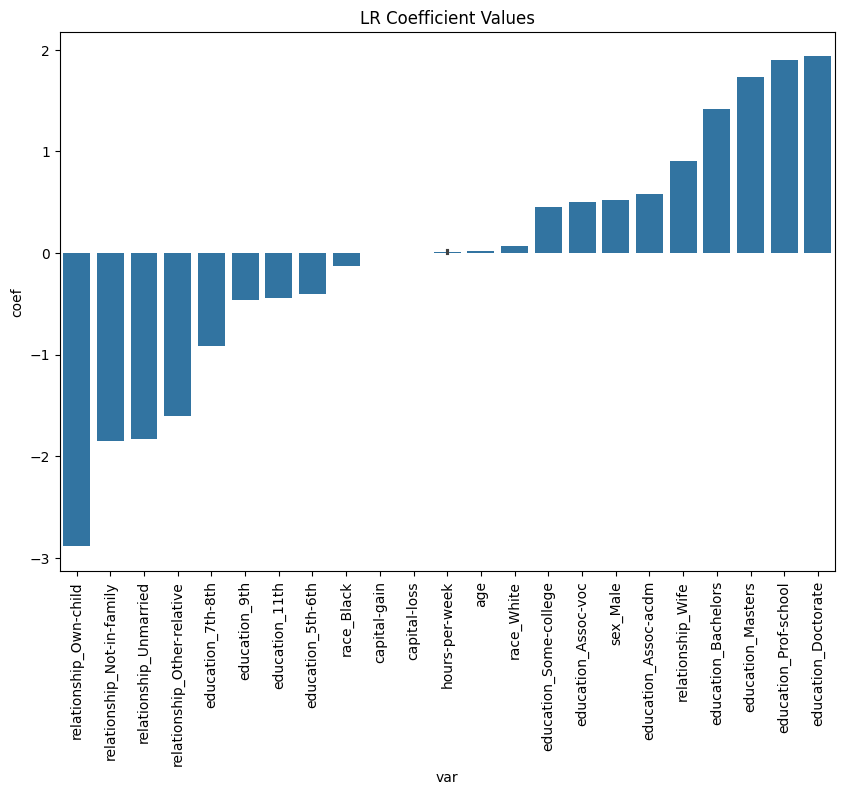

In [234]:
#9. barplot of the coefficients sorted in ascending order
plt.figure(figsize = (10,7))
sns.barplot(data=coef_df, x='var', y='coef')
plt.xticks(rotation=90);
plt.title('LR Coefficient Values')
plt.show()
plt.close()

ROC AUC score: 0.891018084574871


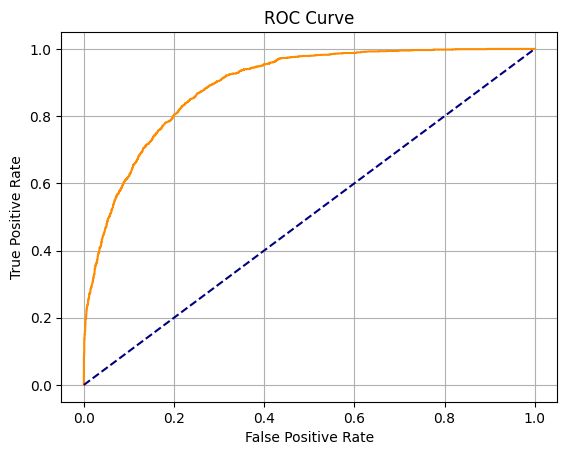

In [235]:
#10. Plot the ROC curve and print the AUC value.
y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.title('ROC Curve')
plt.grid()
plt.show()